# Introduction

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ hai trên toàn cầu. Đây là một bệnh có tỷ lệ mắc bệnh, tàn tật và tử vong cao, trong đó các nạn nhân có thể đột ngột trải qua tình trạng liệt, suy giảm khả năng nói hoặc mất thị lực do sự gián đoạn dòng máu (thiếu máu cục bộ) gây ra bởi huyết khối và thuyên tắc.

Mặc dù cơ chế bệnh sinh của đột quỵ chưa được làm sáng tỏ hoàn toàn, nhưng nó được biết là có mối liên hệ chặt chẽ với các chỉ số trao đổi chất bất thường, trong đó 90% có thể được kiểm soát. Đây là lý do tại sao việc dự đoán đột quỵ có thể mang tính quyết định, giúp các cá nhân được điều trị sớm hơn và tránh các hậu quả tàn tật hoặc tử vong.

# Objective

Mục đích của nghiên cứu này là áp dụng các kỹ thuật Khoa học Dữ liệu và Máy học để xây dựng một mô hình chính xác dựa trên bộ dữ liệu về đột quỵ nhằm dự đoán kết quả đột quỵ từ việc biết các đặc điểm cá nhân của một người. Đồng thời, nghiên cứu cung cấp thông tin hữu ích về khả năng một người có nguy cơ bị đột quỵ, hỗ trợ nhân viên y tế đưa ra các hành động cần thiết nhằm giảm thiểu rủi ro hiện có và tránh những hậu quả nghiêm trọng.

# 2. Data Understanding

Nguồn Data:
https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Reading Data (EDA)

In [2]:
ds= pd.read_csv("/content/DotQuy.csv")
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Feature Description

Chúng ta có thể thấy rằng bộ dữ liệu chứa thông tin về 43400 bệnh nhân, bao gồm các đặc trưng sau:

id: Mã định danh của từng bệnh nhân.

gender: Giới tính của bệnh nhân.

age: Tuổi của bệnh nhân.

hypertension: Cho biết liệu bệnh nhân có bị cao huyết áp hay không.

heart_disease: Cho biết liệu bệnh nhân có mắc bệnh tim mạch hay không.

ever_married: Cho biết liệu bệnh nhân đã từng kết hôn hay chưa.

work_type: Loại công việc của bệnh nhân.

residence_type: Loại nơi cư trú của bệnh nhân (thành thị hoặc nông thôn).

avg_glucose_level: Mức đường huyết trung bình của bệnh nhân.

bmi: Chỉ số khối cơ thể (Body Mass Index) của bệnh nhân.

smoking_status: Tình trạng hút thuốc của bệnh nhân.

stroke: Kết quả đột quỵ của bệnh nhân trong bộ dữ liệu (có hay không bị đột quỵ).

In [3]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'hypertension', 'heart_disease']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

/tmp/ipython-input-3768283149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x='smoking_status', palette='Set2')


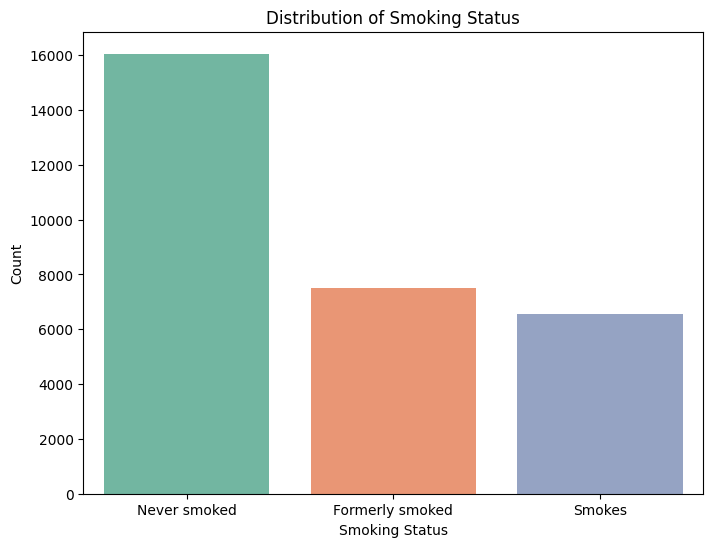

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds, x='smoking_status', palette='Set2')

plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1, 2], labels=['Never smoked', 'Formerly smoked', 'Smokes'])

plt.show()

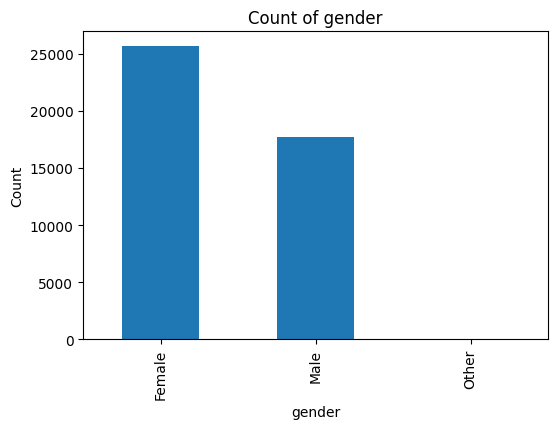

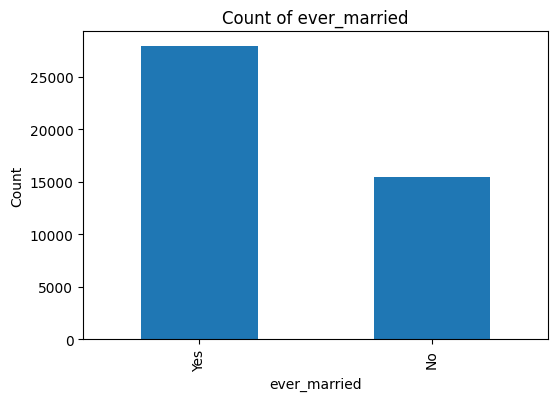

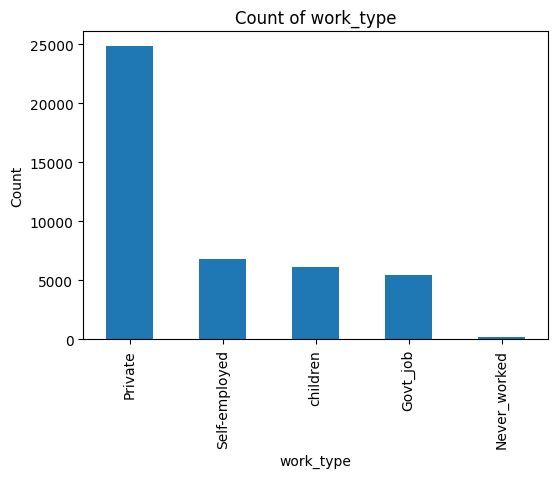

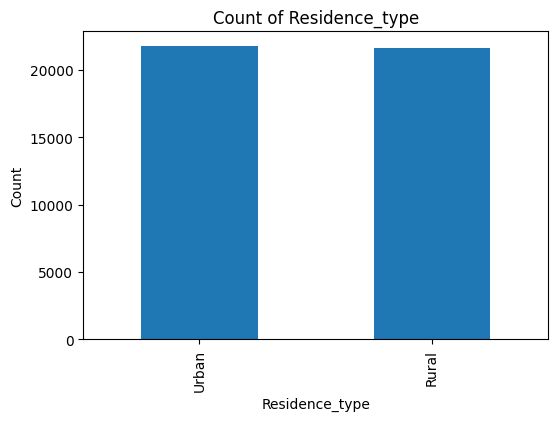

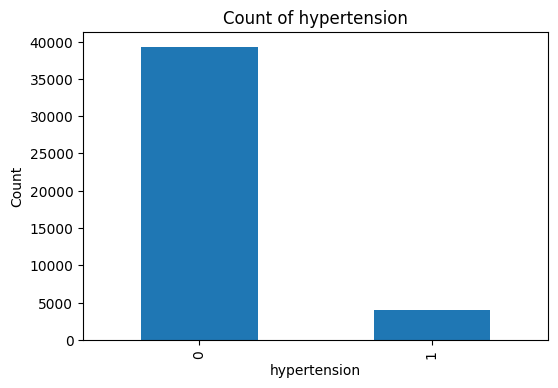

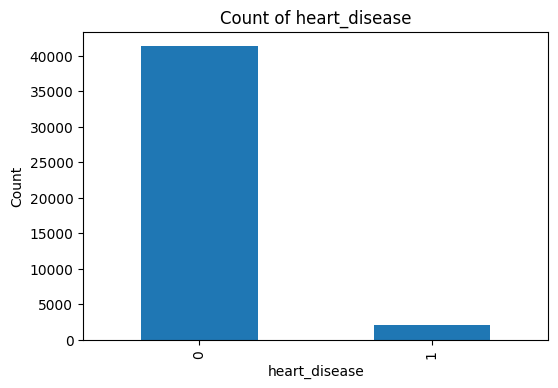

In [5]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    ds[col].value_counts().plot(kind='bar', title=f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


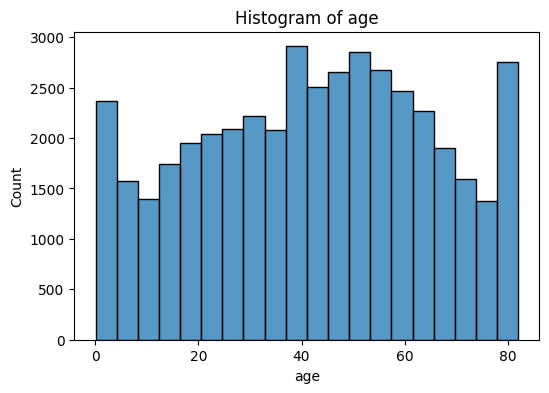

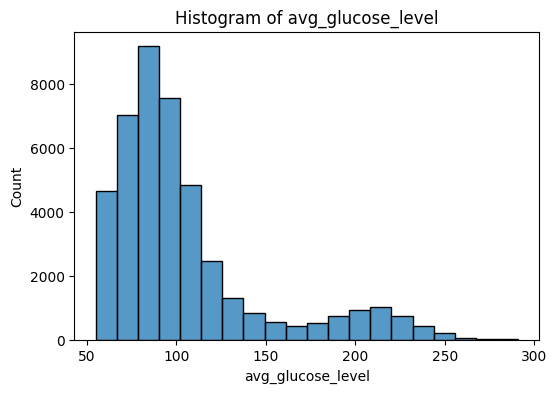

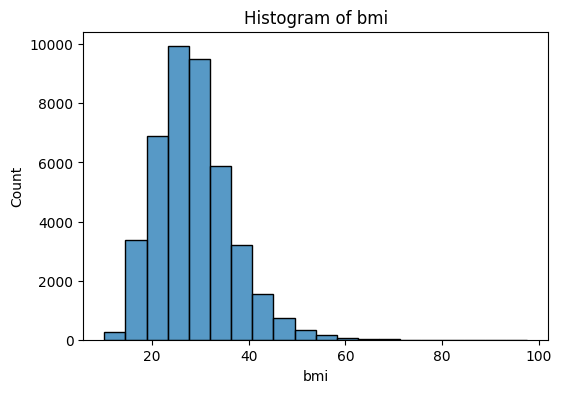

In [6]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(ds[col], bins=20, kde=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Missing Data and Dropping 'id'

Đầu tiên, chúng ta có thể loại bỏ thông tin không cần thiết như 'id', vì đây chỉ là mã định danh của bệnh nhân và không cung cấp thông tin hữu ích nào trong trường hợp này. Nếu sử dụng sẽ dẫn tới OVF

In [7]:
ds.drop(['id'],axis=1, inplace=True)
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


Giờ ta sẽ check xem Data có bị miss dữ liệu nào không

In [8]:
ds.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,1462
smoking_status,13292


Do dữ liệu ở cột BMI bị thiếu ít so với tất cả Data nên xóa các sample có giá trị nhãn 0 đi


In [9]:
#Xóa đi các sample bị thiếu giá trị bmi
#ds=ds.dropna(subset=['bmi'])
# Tính giá trị trung vị của cột 'bmi'
#median_bmi = ds['bmi'].median()
# Điền giá trị trung vị vào các ô bị thiếu
#ds['bmi'].fillna(median_bmi, inplace=True)
ds = ds.drop(ds[(ds['bmi'].isna()) & (ds['stroke'] == 0)].index)

In [10]:
import numpy as np
import scipy.stats as st

data = ds['bmi'].dropna()

distributions = [
    st.norm,          # Gaussian
    st.lognorm,       # Lognormal
    st.gamma,         # Gamma
    st.weibull_min,   # Weibull
    st.expon,         # Exponential
]

results = []

for dist in distributions:
    try:
        params = dist.fit(data)
        loglik = np.sum(dist.logpdf(data, *params))
        results.append((dist.name, loglik))
    except Exception as e:
        pass

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
results_sorted


[('lognorm', np.float64(-143252.90548816536)),
 ('gamma', np.float64(-143275.58677747412)),
 ('weibull_min', np.float64(-144236.66418198062)),
 ('norm', np.float64(-145491.2849855094)),
 ('expon', np.float64(-164314.88902874137))]

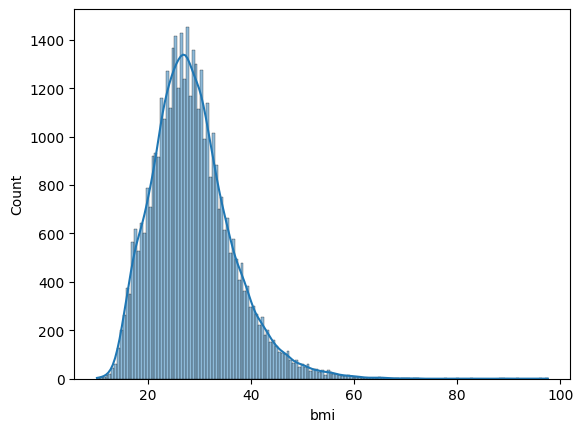

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ds['bmi'].dropna(), kde=True)
plt.show()


Fit lognormal vào BMI không thiếu

In [12]:
# # 1. Tách dữ liệu BMI không bị thiếu
# data = ds['bmi'].dropna()

# # 2. Lấy log(BMI)
# log_bmi = np.log(data)

# # 3. Fit phân phối chuẩn
# mu, sigma = log_bmi.mean(), log_bmi.std()
# mu, sigma
# n_missing = ds['bmi'].isna().sum()

# # Lấy mẫu chuẩn rồi exp để thành lognormal
# samples = np.random.normal(mu, sigma, n_missing)
# samples = np.exp(samples)   # biến từ log → bmi

# ds.loc[ds['bmi'].isna(), 'bmi'] = samples


IMPUTE BẰNG KDE

In [13]:
from sklearn.neighbors import KernelDensity

# 1. Fit KDE
kde = KernelDensity(kernel='gaussian', bandwidth=1.0)
kde.fit(data.values.reshape(-1,1))

# 2. Lấy mẫu cho missing
n_missing = ds['bmi'].isna().sum()
samples = kde.sample(n_missing).flatten()

# 3. Loại mẫu âm (nếu có)
samples[samples < 0] = data.min()

# 4. Điền vào
ds.loc[ds['bmi'].isna(), 'bmi'] = samples


Check lại

In [14]:
ds.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,12916


In [15]:
ds.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [16]:
ds.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000
mean,41.922013,0.087884,0.043752,103.716155,28.602389,0.018608
std,22.504137,0.283130,0.204545,42.312329,7.770890,0.135139
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.372500,23.200000,0.000000
50%,43.000000,0.000000,0.000000,91.350000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,111.590000,32.800000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Từ mô tả, chúng ta có thể xác định được phạm vi giá trị của các đặc trưng số, bao gồm: tuổi, chỉ số đường huyết trung bình và chỉ số khối cơ thể (BMI):

Tuổi: từ 0.08 đến 82 tuổi
Chỉ số đường huyết trung bình: từ 55 đến 291.05
BMI: từ 10.31 đến 97.6

## Unknown smoking status

Trong cột này giá trị bị thiếu rất nhiều nếu cứ để vậy thì có thể dẫn tới nhiễu dữ liệu

In [17]:
missing_smoking_status = ds[ds['smoking_status'].isnull()]

count_flag = missing_smoking_status['stroke'].value_counts()

print("Số lượng giá trị 0 và 1 khi 'smoking_status' bị thiếu:")
print(count_flag)

Số lượng giá trị 0 và 1 khi 'smoking_status' bị thiếu:
stroke
0    12771
1      145
Name: count, dtype: int64


In [18]:
#ds=ds.dropna(subset=['smoking_status'])
# 1. Xác định các dòng missing smoking_status nhưng stroke == 0
mask = ds['smoking_status'].isna() & (ds['stroke'] == 0)

# 2. Loại bỏ các dòng này khỏi dataset để không điền
ds_filtered = ds[~mask].copy()  # dataset mới, bỏ các dòng này

# 3. Tính phân phối smoking_status trên các dữ liệu còn lại
probs = ds_filtered['smoking_status'].value_counts(normalize=True)

# 4. Lấy sample ngẫu nhiên theo phân phối
n_missing = ds_filtered['smoking_status'].isna().sum()
samples = np.random.choice(probs.index, size=n_missing, p=probs.values)

# 5. Điền vào các dòng missing
ds_filtered.loc[ds_filtered['smoking_status'].isna(), 'smoking_status'] = samples

# 6. Nếu muốn, có thể gán lại vào ds gốc (chỉ những dòng còn lại)
ds.loc[~mask, 'smoking_status'] = ds_filtered['smoking_status']


In [19]:
ds.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,12771


## Gender classification

In [20]:
#Giá trị other trong Gender
ds.gender.value_counts(normalize=False)

,count
gender,
Female,25019
Male,17052
Other,7


Chỉ có tỷ lệ nhỏ là giới tính khác nên ta có thể bỏ đi

In [21]:
ds = ds[ds['gender'] != 'Other']
ds.gender.value_counts(normalize=False)

,count
gender,
Female,25019
Male,17052


## Work type assumption

In [22]:
#Giá trị trong Work type
ds.work_type.value_counts(normalize=False)

,count
work_type,
Private,24063
Self-employed,6518
children,6059
Govt_job,5255
Never_worked,176


Do công việc children cũng là never_worked nên có thể chuyển thành Never_Worked

<Axes: title={'center': 'Count (target)'}, xlabel='work_type'>

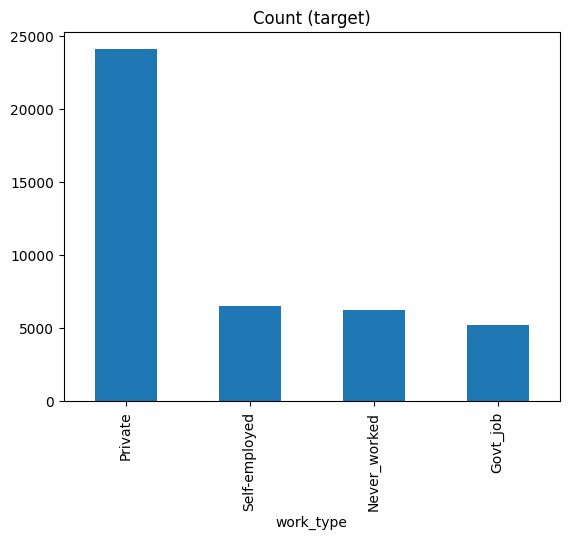

In [23]:
ds.loc[ds['work_type'] == 'children','work_type'] = 'Never_worked'
ds.work_type.value_counts().plot(kind='bar', title='Count (target)')

## MinMaxScaler


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])
print(ds[columns_to_scale].head())

        age  avg_glucose_level       bmi
0  0.035645           0.169964  0.090286
1  0.707031           0.139631  0.332571
2  0.096680           0.236772  0.085714
3  0.853516           0.059479  0.294857
4  0.169922           0.450244  0.102857


## Standard Scaler & Onehot

In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
# ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])
# print(ds[columns_to_scale].head())


## Onehot

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

ds['gender'] = label_encoder.fit_transform(ds['gender'])
ds['ever_married'] = label_encoder.fit_transform(ds['ever_married'])
ds['Residence_type'] = label_encoder.fit_transform(ds['Residence_type'])
ds = pd.get_dummies(ds, columns=['work_type'], drop_first=True)
ds = pd.get_dummies(ds, columns=['smoking_status'], drop_first=True)
print(ds[['gender', 'ever_married', 'Residence_type']].head())

   gender  ever_married  Residence_type
0       1             0               0
1       1             1               1
2       0             0               1
3       0             1               0
4       1             0               0


In [27]:
ds

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
0,1,0.035645,0,0,0,0,0.169964,0.090286,0,True,False,False,False,False
1,1,0.707031,1,0,1,1,0.139631,0.332571,0,False,True,False,True,False
2,0,0.096680,0,0,0,1,0.236772,0.085714,0,False,True,False,False,False
3,0,0.853516,0,0,1,0,0.059479,0.294857,0,False,True,False,False,False
4,1,0.169922,0,0,0,0,0.450244,0.102857,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0.121094,0,0,0,1,0.015420,0.117714,0,True,False,False,True,False
43396,0,0.682617,0,0,1,1,0.671934,0.517714,0,False,False,False,False,False
43397,0,1.000000,1,0,1,1,0.156492,0.214857,0,False,True,False,False,False
43398,1,0.487305,0,0,1,1,0.187079,0.264000,0,False,True,False,True,False


In [28]:
columns_to_convert = ['smoking_status_never smoked', 'smoking_status_smokes','work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']
ds[columns_to_convert] = ds[columns_to_convert].astype(int)

In [29]:
ds

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
0,1,0.035645,0,0,0,0,0.169964,0.090286,0,1,0,0,0,0
1,1,0.707031,1,0,1,1,0.139631,0.332571,0,0,1,0,1,0
2,0,0.096680,0,0,0,1,0.236772,0.085714,0,0,1,0,0,0
3,0,0.853516,0,0,1,0,0.059479,0.294857,0,0,1,0,0,0
4,1,0.169922,0,0,0,0,0.450244,0.102857,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0.121094,0,0,0,1,0.015420,0.117714,0,1,0,0,1,0
43396,0,0.682617,0,0,1,1,0.671934,0.517714,0,0,0,0,0,0
43397,0,1.000000,1,0,1,1,0.156492,0.214857,0,0,1,0,0,0
43398,1,0.487305,0,0,1,1,0.187079,0.264000,0,0,1,0,1,0


#Chia train và test

In [30]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ds, test_size=0.25, random_state=0)
pd.DataFrame({"Train Row Count": [train_data.shape[0]],"Test Row Count": [test_data.shape[0]]}, index=["Data"])

,Train Row Count,Test Row Count
Data,31553,10518


In [79]:
display(test_data.head())

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
30543,0,0.084473,0,0,0,1,0.250667,0.138286,0,1,0,0,0,0
41285,0,0.523926,0,0,1,1,0.569922,0.547429,0,0,0,1,0,1
29489,1,0.047852,0,0,0,1,0.167676,0.069714,0,1,0,0,0,0
2239,0,0.230957,0,0,0,1,0.332896,0.158857,0,0,0,0,1,0
14189,1,0.975586,0,0,1,1,0.114383,0.211429,0,0,0,1,0,0


#Handel Sampling

In [31]:
ds.stroke.value_counts(normalize=False)

,count
stroke,
0,41288
1,783


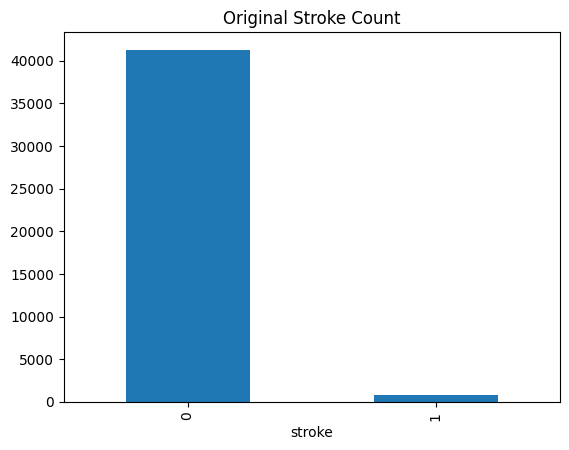

In [32]:
ds.stroke.value_counts().plot(kind='bar', title='Original Stroke Count');

Bộ dữ liệu bị Imbalanced nặng, giá trị mà người bệnh bị đột quỵ chỉ chiếm gần 1.8% toàn bệnh nhân

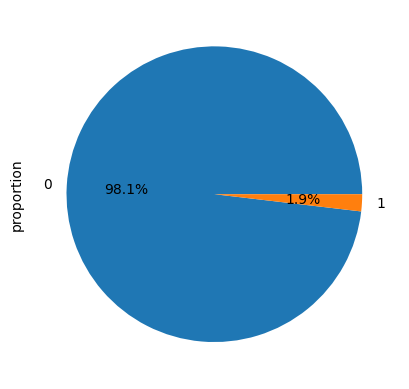

In [33]:
ds.stroke.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

## Hàm Modul

### SVM

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_svm(X_train, y_train, X_test, y_test, random_state=42):
    svm = SVC(random_state=random_state)
    svm.fit(X_train, y_train)
    y_pred_svmc = svm.predict(X_test)
    svm_acc = accuracy_score(y_test, y_pred_svmc)
    svm_recall = recall_score(y_test, y_pred_svmc, pos_label=1)
    print(f"Accuracy: {svm_acc:.4f}")
    print(f"Recall: {svm_recall:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_svmc))

    return svm


### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_logistic_regression(X_train, y_train, X_test, y_test, random_state=42):
    logistic_regression = LogisticRegression(random_state=random_state)
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_test)
    lr_acc = accuracy_score(y_test, y_pred_lr)
    lr_recall = recall_score(y_test, y_pred_lr, pos_label=1)
    print(f"Accuracy: {lr_acc:.4f}")
    print(f"Recall: {lr_recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))
    return logistic_regression

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_random_forest(X_train, y_train, X_test, y_test, random_state=42):
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, y_pred_rf)
    rf_recall = recall_score(y_test, y_pred_rf, pos_label=1)
    print(f"Accuracy: {rf_acc:.4f}")
    print(f"Recall: {rf_recall:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    return rf

## Random under-sampling

In [37]:
count_class_0, count_class_1 = train_data.stroke.value_counts()

ds_class_0 = train_data[train_data['stroke'] == 0]
ds_class_1 = train_data[train_data['stroke'] == 1]

Random under-sampling:
stroke
0    595
1    595
Name: count, dtype: int64


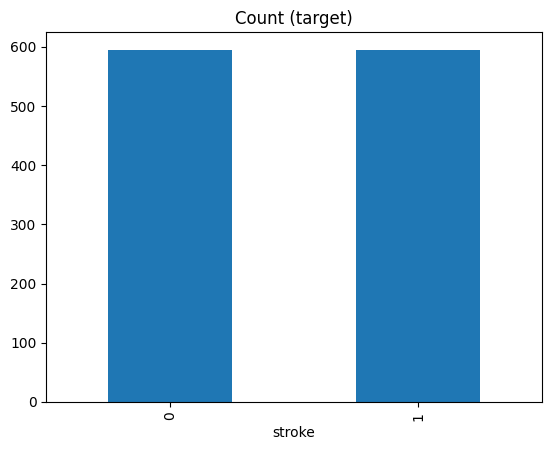

In [38]:
ds_class_0_under = ds_class_0.sample(count_class_1)
train_under = pd.concat([ds_class_0_under, ds_class_1], axis=0)

print('Random under-sampling:')
print(train_under.stroke.value_counts())

train_under.stroke.value_counts().plot(kind='bar', title='Count (target)');

In [39]:
train_under

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
17044,0,0.755859,0,0,1,0,0.269392,0.145143,0,0,1,0,1,0
23893,1,0.084473,0,0,0,1,0.263292,0.178286,0,1,0,0,0,0
28940,0,0.511719,0,0,1,1,0.275831,0.246857,0,0,1,0,1,0
16827,0,0.951172,0,0,1,1,0.157424,0.252571,0,0,1,0,1,0
26145,1,0.829102,0,0,1,1,0.101928,0.222857,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,1,0.792480,0,0,1,1,0.076594,0.243429,1,0,0,0,1,0
28672,0,0.975586,1,0,1,1,0.240712,0.354617,1,0,1,0,1,0
20621,0,0.816895,1,1,1,0,0.618640,0.144000,1,0,0,0,0,1
34970,0,0.951172,0,1,1,1,0.106206,0.114286,1,0,0,0,0,0


In [40]:
X_train = train_under.drop('stroke', axis=1)
y_train = train_under['stroke']
X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

### Feature Importance

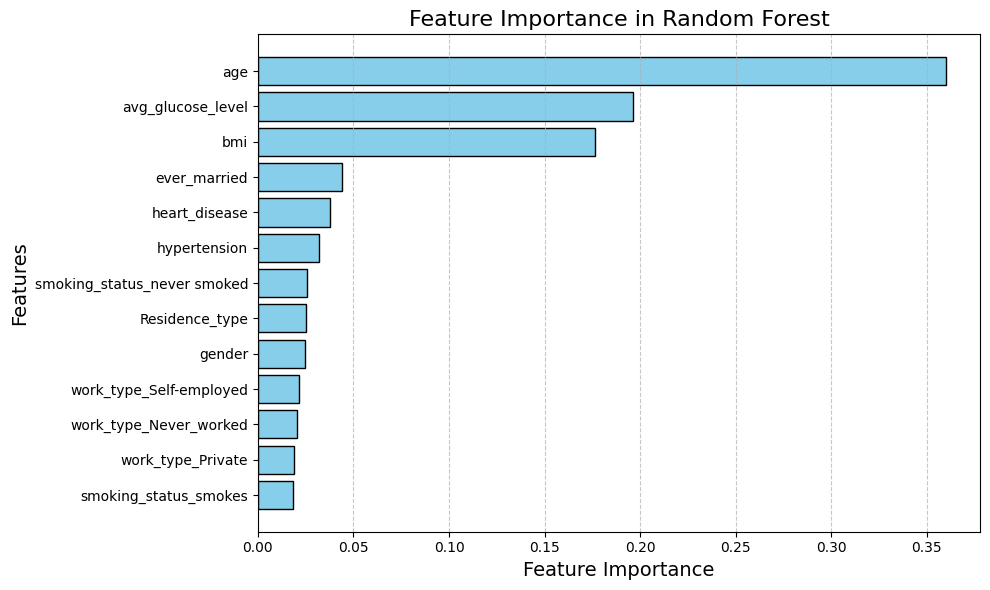

In [41]:
from sklearn.ensemble import RandomForestClassifier

X = X_train
y = y_train
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_

features = X.columns

sorted_idx = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
features_sorted = [features[i] for i in sorted_idx]
importance_sorted = [importance[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_sorted, color="skyblue", edgecolor="black")
plt.title("Feature Importance in Random Forest", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### SVM

All Feature

In [77]:
svm_model=train_svm(X_train,y_train,X_test,y_test)
svm_model

Accuracy: 0.7045
Recall: 0.8617

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     10330
           1       0.05      0.86      0.09       188

    accuracy                           0.70     10518
   macro avg       0.52      0.78      0.46     10518
weighted avg       0.98      0.70      0.81     10518



SVC(random_state=42)

In [78]:
import joblib

joblib.dump(svm_model, 'svm_smoking.pkl')
print("Mô hình SVM đã được lưu vào 'svm_smoking.pkl'")


Mô hình SVM đã được lưu vào 'svm_smoking.pkl'


1 Feature

In [43]:
X_train1 = train_under[['age']]
X_test1 = test_data[['age']]
y_train1 = train_under['stroke']
y_test1 = test_data['stroke']
train_svm(X_train1,y_train1,X_test1,y_test1)

Accuracy: 0.6884
Recall: 0.8511

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81     10330
           1       0.05      0.85      0.09       188

    accuracy                           0.69     10518
   macro avg       0.52      0.77      0.45     10518
weighted avg       0.98      0.69      0.80     10518



SVC(random_state=42)

3 Feature

In [44]:
X_train3 = train_under[['age', 'avg_glucose_level', 'bmi']]
X_test3 = test_data[['age', 'avg_glucose_level', 'bmi']]
y_train3 = train_under['stroke']
y_test3 = test_data['stroke']
train_svm(X_train3,y_train3,X_test3,y_test3)

Accuracy: 0.6955
Recall: 0.8298

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     10330
           1       0.05      0.83      0.09       188

    accuracy                           0.70     10518
   macro avg       0.52      0.76      0.45     10518
weighted avg       0.98      0.70      0.80     10518



SVC(random_state=42)

5 Feature

In [45]:
X_train5 = train_under[['age','avg_glucose_level','bmi','hypertension','heart_disease'] ]
X_test5 = test_data[['age','avg_glucose_level','bmi','hypertension','heart_disease'] ]
y_train5 = train_under['stroke']
y_test5 = test_data['stroke']
train_svm(X_train5,y_train5,X_test5,y_test5)

Accuracy: 0.7197
Recall: 0.8191

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83     10330
           1       0.05      0.82      0.09       188

    accuracy                           0.72     10518
   macro avg       0.52      0.77      0.46     10518
weighted avg       0.98      0.72      0.82     10518



SVC(random_state=42)

7 Feature

In [46]:
X_train7 = train_under[['age','avg_glucose_level','bmi','hypertension','heart_disease','Residence_type','gender' ]]
X_test7 = test_data[['age','avg_glucose_level','bmi','hypertension','heart_disease','Residence_type','gender' ]]
y_train7 = train_under['stroke']
y_test7 = test_data['stroke']
train_svm(X_train7,y_train7,X_test7,y_test7)

Accuracy: 0.7027
Recall: 0.8511

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     10330
           1       0.05      0.85      0.09       188

    accuracy                           0.70     10518
   macro avg       0.52      0.78      0.46     10518
weighted avg       0.98      0.70      0.81     10518



SVC(random_state=42)

### Logistic Regression

Full Feature

In [47]:
train_logistic_regression(X_train,y_train,X_test,y_test)

Accuracy: 0.7448
Recall: 0.8245

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     10330
           1       0.06      0.82      0.10       188

    accuracy                           0.74     10518
   macro avg       0.53      0.78      0.48     10518
weighted avg       0.98      0.74      0.84     10518



LogisticRegression(random_state=42)

1 Feature

In [48]:
train_logistic_regression(X_train1,y_train1,X_test1,y_test1)

Accuracy: 0.7172
Recall: 0.8245

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83     10330
           1       0.05      0.82      0.09       188

    accuracy                           0.72     10518
   macro avg       0.52      0.77      0.46     10518
weighted avg       0.98      0.72      0.82     10518



LogisticRegression(random_state=42)

3 Feature

In [49]:
train_logistic_regression(X_train3,y_train3,X_test3,y_test3)

Accuracy: 0.7322
Recall: 0.7979

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     10330
           1       0.05      0.80      0.10       188

    accuracy                           0.73     10518
   macro avg       0.52      0.76      0.47     10518
weighted avg       0.98      0.73      0.83     10518



LogisticRegression(random_state=42)

5 Feature

In [50]:
train_logistic_regression(X_train5,y_train5,X_test5,y_test5)

Accuracy: 0.7464
Recall: 0.8032

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85     10330
           1       0.05      0.80      0.10       188

    accuracy                           0.75     10518
   macro avg       0.52      0.77      0.48     10518
weighted avg       0.98      0.75      0.84     10518



LogisticRegression(random_state=42)

7 Feature

In [51]:
train_logistic_regression(X_train7,y_train7,X_test7,y_test7)

Accuracy: 0.7479
Recall: 0.7979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85     10330
           1       0.05      0.80      0.10       188

    accuracy                           0.75     10518
   macro avg       0.52      0.77      0.48     10518
weighted avg       0.98      0.75      0.84     10518



LogisticRegression(random_state=42)

### Random Forest

All Feature

In [52]:
train_random_forest(X_train,y_train,X_test,y_test)

Accuracy: 0.7297
Recall: 0.7872

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     10330
           1       0.05      0.79      0.09       188

    accuracy                           0.73     10518
   macro avg       0.52      0.76      0.47     10518
weighted avg       0.98      0.73      0.83     10518



RandomForestClassifier(random_state=42)

1 Feature

In [53]:
train_random_forest(X_train1,y_train1,X_test1,y_test1)

Accuracy: 0.6962
Recall: 0.8191

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     10330
           1       0.05      0.82      0.09       188

    accuracy                           0.70     10518
   macro avg       0.52      0.76      0.45     10518
weighted avg       0.98      0.70      0.80     10518



RandomForestClassifier(random_state=42)

3 Feature

In [54]:
train_random_forest(X_train3,y_train3,X_test3,y_test3)

Accuracy: 0.7063
Recall: 0.7713

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     10330
           1       0.05      0.77      0.09       188

    accuracy                           0.71     10518
   macro avg       0.52      0.74      0.46     10518
weighted avg       0.98      0.71      0.81     10518



RandomForestClassifier(random_state=42)

5 Feature

In [55]:
train_random_forest(X_train5,y_train5,X_test5,y_test5)

Accuracy: 0.7183
Recall: 0.7926

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     10330
           1       0.05      0.79      0.09       188

    accuracy                           0.72     10518
   macro avg       0.52      0.75      0.46     10518
weighted avg       0.98      0.72      0.82     10518



RandomForestClassifier(random_state=42)

7 Feature

In [56]:
train_random_forest(X_train7,y_train7,X_test7,y_test7)

Accuracy: 0.7289
Recall: 0.7606

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     10330
           1       0.05      0.76      0.09       188

    accuracy                           0.73     10518
   macro avg       0.52      0.74      0.47     10518
weighted avg       0.98      0.73      0.83     10518



RandomForestClassifier(random_state=42)

## Random Over-sampling

### SMOTE Over-Sampling

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
X_smote = train_data.drop(columns=['stroke'])
y_smote = train_data['stroke']

stroke
0    30958
1    30958
Name: count, dtype: int64


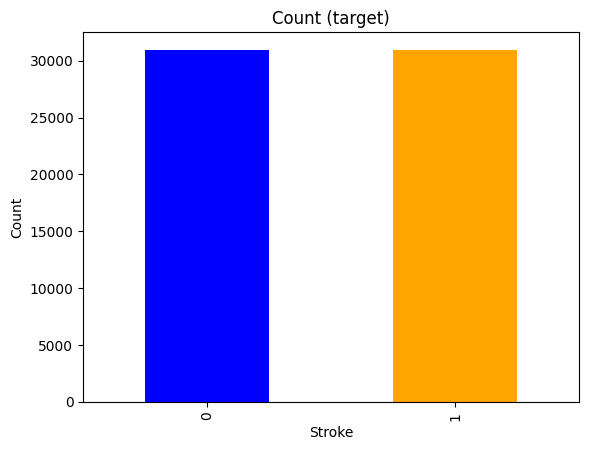

In [59]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)

print(y_sm.value_counts())

y_sm.value_counts().plot(kind='bar', title='Count (target)', color=['blue', 'orange'])
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


In [60]:
X_trainsm = X_sm
y_trainsm = y_sm
X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

### Feature Importance

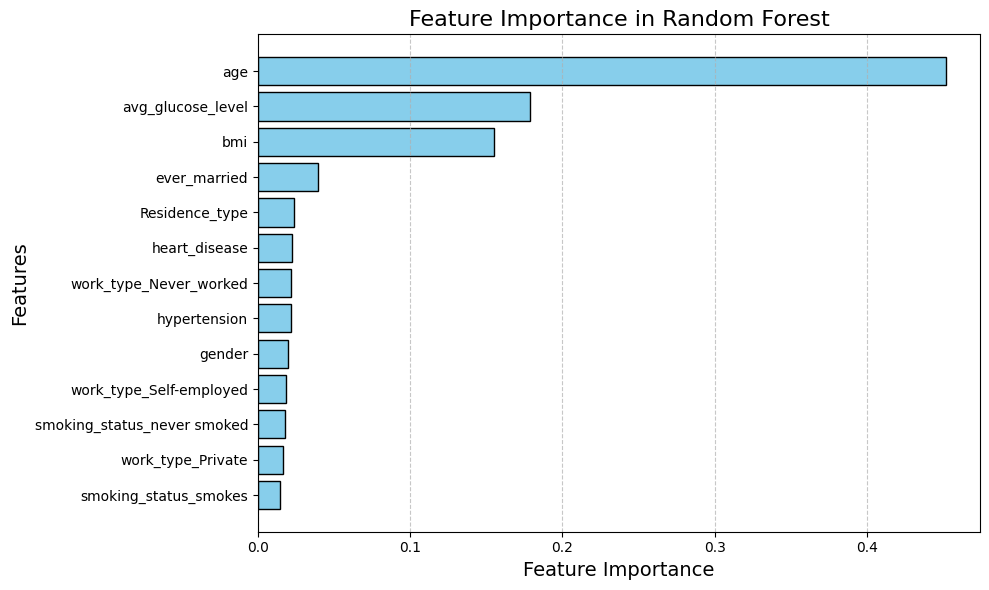

In [61]:
from sklearn.ensemble import RandomForestClassifier

X = X_trainsm
y = y_trainsm
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_

features = X.columns

sorted_idx = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
features_sorted = [features[i] for i in sorted_idx]
importance_sorted = [importance[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_sorted, color="skyblue", edgecolor="black")
plt.title("Feature Importance in Random Forest", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### SVM

All Feature

In [62]:
train_svm(X_trainsm,y_trainsm,X_test,y_test)

Accuracy: 0.7658
Recall: 0.7234

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     10330
           1       0.05      0.72      0.10       188

    accuracy                           0.77     10518
   macro avg       0.52      0.75      0.48     10518
weighted avg       0.98      0.77      0.85     10518



SVC(random_state=42)

1 Feature

In [63]:
X_train1sm = X_trainsm[['age']]
X_test1sm = test_data[['age']]
y_train1sm = y_trainsm
y_test1sm = test_data['stroke']
train_svm(X_train1sm,y_train1sm,X_test1sm,y_test1sm)

Accuracy: 0.7042
Recall: 0.8457

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     10330
           1       0.05      0.85      0.09       188

    accuracy                           0.70     10518
   macro avg       0.52      0.77      0.46     10518
weighted avg       0.98      0.70      0.81     10518



SVC(random_state=42)

3 Feature

In [64]:
X_train3sm = X_trainsm[['age','avg_glucose_level','bmi']]
X_test3sm = test_data[['age','avg_glucose_level','bmi']]
y_train3sm = y_trainsm
y_test3sm = test_data['stroke']
train_svm(X_train3sm,y_train3sm,X_test3sm,y_test3sm)

Accuracy: 0.7258
Recall: 0.8191

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     10330
           1       0.05      0.82      0.10       188

    accuracy                           0.73     10518
   macro avg       0.52      0.77      0.47     10518
weighted avg       0.98      0.73      0.83     10518



SVC(random_state=42)

5 Feature

In [65]:
X_train5sm = X_trainsm[['age','avg_glucose_level','bmi','Residence_type','gender']]
X_test5sm = test_data[['age','avg_glucose_level','bmi','Residence_type','gender']]
y_train5sm = y_trainsm
y_test5sm = test_data['stroke']
train_svm(X_train5sm,y_train5sm,X_test5sm,y_test5sm)

Accuracy: 0.7071
Recall: 0.8351

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.83     10330
           1       0.05      0.84      0.09       188

    accuracy                           0.71     10518
   macro avg       0.52      0.77      0.46     10518
weighted avg       0.98      0.71      0.81     10518



SVC(random_state=42)

7 Feature

In [66]:
X_train7sm = X_trainsm[['age','avg_glucose_level','bmi','Residence_type','gender','heart_disease','hypertension'] ]
X_test7sm = test_data[['age','avg_glucose_level','bmi','Residence_type','gender','heart_disease','hypertension'] ]
y_train7sm = y_trainsm
y_test7sm = test_data['stroke']
train_svm(X_train7sm,y_train7sm,X_test7sm,y_test7sm)

Accuracy: 0.7194
Recall: 0.8085

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83     10330
           1       0.05      0.81      0.09       188

    accuracy                           0.72     10518
   macro avg       0.52      0.76      0.46     10518
weighted avg       0.98      0.72      0.82     10518



SVC(random_state=42)

### Random Forest

All Feature

In [67]:
train_random_forest(X_trainsm,y_trainsm,X_test,y_test)

Accuracy: 0.9246
Recall: 0.1543

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10330
           1       0.04      0.15      0.07       188

    accuracy                           0.92     10518
   macro avg       0.51      0.55      0.51     10518
weighted avg       0.97      0.92      0.94     10518



RandomForestClassifier(random_state=42)

1 Feature

In [68]:
train_random_forest(X_train1sm,y_train1sm,X_test1sm,y_test1sm)

Accuracy: 0.9821
Recall: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10330
           1       0.00      0.00      0.00       188

    accuracy                           0.98     10518
   macro avg       0.49      0.50      0.50     10518
weighted avg       0.96      0.98      0.97     10518



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(random_state=42)

3 Feature

In [69]:
train_random_forest(X_train3sm,y_train3sm,X_test3sm,y_test3sm)

Accuracy: 0.9040
Recall: 0.3032

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     10330
           1       0.06      0.30      0.10       188

    accuracy                           0.90     10518
   macro avg       0.52      0.61      0.53     10518
weighted avg       0.97      0.90      0.93     10518



RandomForestClassifier(random_state=42)

5 Feature

In [70]:
train_random_forest(X_train5sm,y_train5sm,X_test5sm,y_test5sm)

Accuracy: 0.9151
Recall: 0.2447

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10330
           1       0.06      0.24      0.09       188

    accuracy                           0.92     10518
   macro avg       0.52      0.59      0.52     10518
weighted avg       0.97      0.92      0.94     10518



RandomForestClassifier(random_state=42)

7 Feature

In [71]:
train_random_forest(X_train7sm,y_train7sm,X_test7sm,y_test7sm)

Accuracy: 0.9035
Recall: 0.3351

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     10330
           1       0.07      0.34      0.11       188

    accuracy                           0.90     10518
   macro avg       0.53      0.62      0.53     10518
weighted avg       0.97      0.90      0.93     10518



RandomForestClassifier(random_state=42)

### Logistic Regression

All Feature

In [72]:
train_logistic_regression(X_trainsm,y_trainsm,X_test,y_test)

Accuracy: 0.7555
Recall: 0.8191

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     10330
           1       0.06      0.82      0.11       188

    accuracy                           0.76     10518
   macro avg       0.53      0.79      0.48     10518
weighted avg       0.98      0.76      0.84     10518



LogisticRegression(random_state=42)

1 Feature

In [73]:
train_logistic_regression(X_train1sm,y_train1sm,X_test1sm,y_test1sm)

Accuracy: 0.7479
Recall: 0.7819

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     10330
           1       0.05      0.78      0.10       188

    accuracy                           0.75     10518
   macro avg       0.52      0.76      0.48     10518
weighted avg       0.98      0.75      0.84     10518



LogisticRegression(random_state=42)

3 Feature

In [74]:
train_logistic_regression(X_train3sm,y_train3sm,X_test3sm,y_test3sm)

Accuracy: 0.7488
Recall: 0.7819

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     10330
           1       0.05      0.78      0.10       188

    accuracy                           0.75     10518
   macro avg       0.52      0.77      0.48     10518
weighted avg       0.98      0.75      0.84     10518



LogisticRegression(random_state=42)

5 Feature

In [75]:
train_logistic_regression(X_train5sm,y_train5sm,X_test5sm,y_test5sm)

Accuracy: 0.7500
Recall: 0.7979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85     10330
           1       0.05      0.80      0.10       188

    accuracy                           0.75     10518
   macro avg       0.52      0.77      0.48     10518
weighted avg       0.98      0.75      0.84     10518



LogisticRegression(random_state=42)

7 Feature

In [76]:
train_logistic_regression(X_train7sm,y_train7sm,X_test7sm,y_test7sm)

Accuracy: 0.7500
Recall: 0.7979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85     10330
           1       0.05      0.80      0.10       188

    accuracy                           0.75     10518
   macro avg       0.52      0.77      0.48     10518
weighted avg       0.98      0.75      0.84     10518



LogisticRegression(random_state=42)